In [1]:
from llmtosql.model import WikiSQLModel
from llmtosql.trainer import Trainer
from llmtosql.dataloader import WikiSQLDataset
from llmtosql.utils.utils import plot_history, load_model, load_history
from matplotlib import pyplot as plt
import sys
import os
import json
import numpy as np
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
# os.environ['PYTORCH_ENABLE_MPS_FALLBACK']='1'
sys.path.insert(0, '..')

In [2]:
print(os.environ["VIRTUAL_ENV"])

/Users/albertomerango/Coeuraj/v_env


In [3]:
path = '../WikiSQL/data/dev.jsonl'

In [4]:
train_set =  WikiSQLDataset(type='dev')

In [5]:
# val_set = WikiSQLDataset(type='dev')

In [6]:
len(train_set.data)

8421

In [7]:
# datasets = (train_set, val_set)

In [8]:
model = WikiSQLModel(base_model_type='bert-base-cased')
try:
    model = load_model(model, 'model_output/model.pth')
except:
    print('No model loaded')

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


No model loaded


In [9]:
config = {
    'seed': 32,
    'scheduler': None,
    'optimizer': 'adam',
    'momentum': 0.9,
    'weight_decay': 0.0,
    'lr': 0.0005,
    'criterion': 'cross_entropy',
    'metric': 'accuracy',
    'pred_function': 'softmax',
    'model_dir': 'model_output',
    'backend': 'smddp'
}

In [10]:
trainer = Trainer(model, datasets=train_set,
                  epochs=5, batch_size=32,
                  is_parallel=False,
                  attention_type='sqlnet',
                  **config)

2023-02-27 11:55.03 [info     ] Config inputs.                 config={'seed': 32, 'scheduler': None, 'optimizer': 'adam', 'momentum': 0.9, 'weight_decay': 0.0, 'lr': 0.0005, 'criterion': 'cross_entropy', 'metric': 'accuracy', 'pred_function': 'softmax', 'model_dir': 'model_output', 'backend': 'smddp'}
2023-02-27 11:55.03 [info     ] Loading the model.
2023-02-27 11:55.03 [info     ] Training on device: cpu.
2023-02-27 11:55.03 [info     ] Loading training and validation set.
2023-02-27 11:55.03 [info     ] Preparing the data.
2023-02-27 11:55.03 [debug    ] Processes 8421/8421 (100%) of train data


In [11]:
trainer.fit()

2023-02-27 11:55.03 [info     ] Start training..
2023-02-27 11:55.03 [info     ] ------------------------------ EPOCH 1 / 5 ------------------------------


100%|██████████| 264/264 [2:10:16<00:00, 29.61s/batch, loss=27, metric=0.152]     

2023-02-27 14:05.20 [info     ] Saving the model.


2023-02-27 14:05.20 [info     ] train loss: 26.981723100850076 - train accuracy: 0.15234375
2023-02-27 14:05.20 [info     ] ------------------------------ EPOCH 2 / 5 ------------------------------


100%|██████████| 264/264 [2:12:00<00:00, 30.00s/batch, loss=7.92, metric=0.185]   

2023-02-27 16:17.21 [info     ] Saving the model.


2023-02-27 16:17.22 [info     ] train loss: 7.922426628343986 - train accuracy: 0.18541666666666667
2023-02-27 16:17.22 [info     ] ------------------------------ EPOCH 3 / 5 ------------------------------


100%|██████████| 264/264 [2:07:18<00:00, 28.93s/batch, loss=5.7, metric=0.191]    

2023-02-27 18:24.40 [info     ] Saving the model.


2023-02-27 18:24.41 [info     ] train loss: 5.699761154976758 - train accuracy: 0.19069602272727273
2023-02-27 18:24.41 [info     ] ------------------------------ EPOCH 4 / 5 ------------------------------


100%|██████████| 264/264 [2:01:26<00:00, 27.60s/batch, loss=5.62, metric=0.188]   

2023-02-27 20:26.08 [info     ] Saving the model.


2023-02-27 20:26.08 [info     ] train loss: 5.623027953234586 - train accuracy: 0.1875473484848485
2023-02-27 20:26.08 [info     ] ------------------------------ EPOCH 5 / 5 ------------------------------


100%|██████████| 264/264 [2:01:27<00:00, 27.60s/batch, loss=3.92, metric=0.201]   

2023-02-27 22:27.36 [info     ] Saving the model.


2023-02-27 22:27.37 [info     ] train loss: 3.923198392445391 - train accuracy: 0.20104166666666667
2023-02-27 22:27.37 [info     ] Training Complete.


In [12]:
trainer.save_history_('model_output')

2023-02-27 22:27.37 [info     ] Saving the training history.


In [13]:
history = load_history('model_output')

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

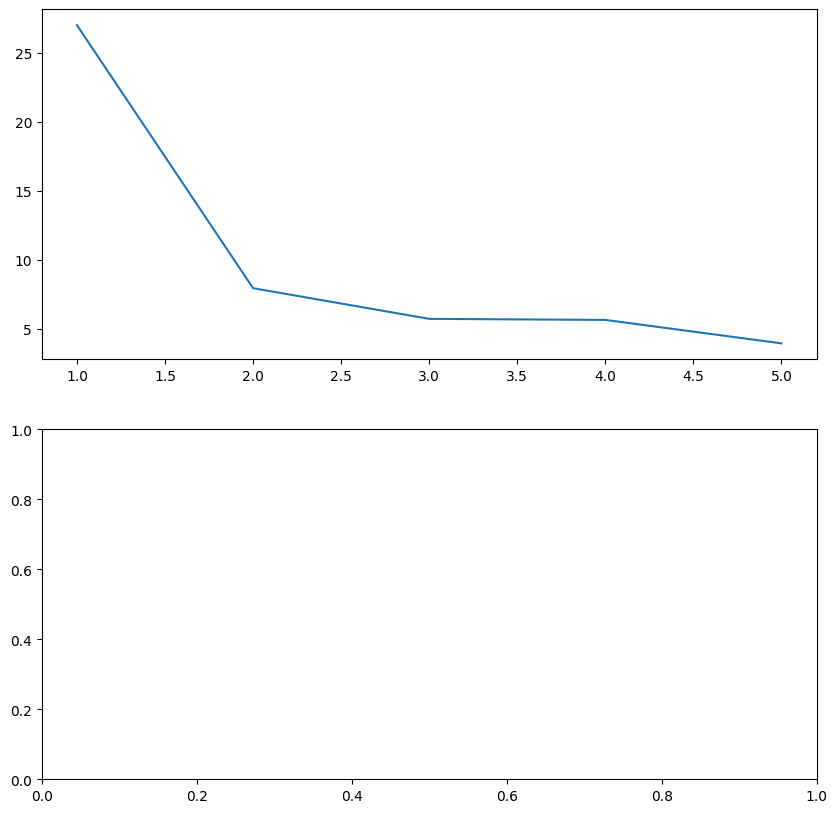

In [14]:
plot_history(history)

In [ ]:
model = MLModel()
model = load_model(model, 'model_output/model.pth')
test_loss, test_accuracy = trainer.test(model, trainer.val_loader)

In [ ]:
print(f'Model accuracy on test: {test_accuracy}')